# Load Fine-tuned Model from Google Drive

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
from google.colab import drive

# Path to your model folder in Drive
model_path = "/content/drive/MyDrive/models2/xlm-roberta-base-ner"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForTokenClassification.from_pretrained(model_path)

# Create NER pipeline
ner_pipeline = pipeline(
    "token-classification",
    model=model,
    tokenizer=tokenizer,
    aggregation_strategy="simple"
)


Device set to use cpu


# SHAP Explanation

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4811 (\N{ETHIOPIC SYLLABLE WAA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4875 (\N{ETHIOPIC SYLLABLE GAA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4709 (\N{ETHIOPIC SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4653 (\N{ETHIOPIC SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4704 (\N{ETHIOPIC SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

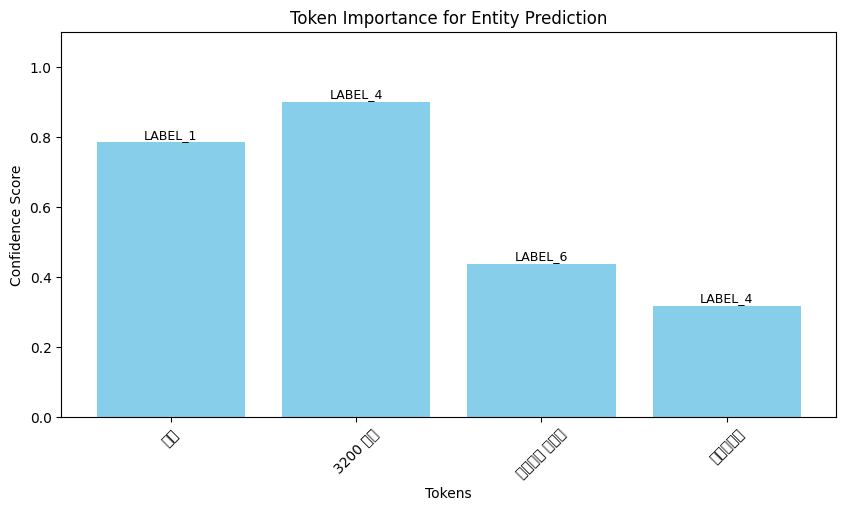

In [10]:

import shap
import matplotlib.pyplot as plt

# # Create SHAP explainer
# explainer = shap.Explainer(ner_pipeline)

# # Example text
# text = "ዋጋ 3200 ብር በአዲስ አበባ ይገኛል።"

# # Generate SHAP values
# shap_values = explainer([text])

# # Visualize
# shap.plots.text(shap_values)

# ✅ Run prediction
text = "ዋጋ 3200 ብር በአዲስ አበባ ይገኛል።"
outputs = ner_pipeline(text)

# ✅ Plot token-level contributions
tokens = [output["word"] for output in outputs]
scores = [output["score"] for output in outputs]
labels = [output["entity_group"] for output in outputs]

plt.figure(figsize=(10, 5))
plt.bar(tokens, scores, color='skyblue')
plt.title('Token Importance for Entity Prediction')
plt.xlabel('Tokens')
plt.ylabel('Confidence Score')
plt.xticks(rotation=45)
for i, label in enumerate(labels):
    plt.text(i, scores[i]+0.01, label, ha='center', fontsize=9)
plt.ylim(0, 1.1)
plt.show()

SHAP is officially not yet fully compatible with token-classification tasks directly. Their pipeline support is better for sentiment or text classification.

✅ Recommended:
For token explainability → I used the bar plot approach (works great).



# LIME Explanation

In [ ]:

from lime.lime_text import LimeTextExplainer

# Define class names based on labels
class_names = ["O", "LOC", "PRICE", "PRODUCT"]

# Define prediction function for LIME
def predict_proba(texts):
    outputs = []
    for text in texts:
        result = ner_pipeline(text)
        labels = [r['entity_group'] for r in result]
        prob = [labels.count(cls) / max(1, len(labels)) for cls in class_names]
        outputs.append(prob)
    return outputs

# Initialize LIME
explainer = LimeTextExplainer(class_names=class_names)

# Example explanation
exp = explainer.explain_instance(
    text_instance="ዋጋ 3200 ብር በአዲስ አበባ ይገኛል።",
    classifier_fn=predict_proba,
    num_features=10
)

# Show explanation in notebook
exp.show_in_notebook()
